In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy
from datetime import datetime
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from google.colab import files
#from pandas.plotting import register_matplotlib_converters
#register_matplotlib_converters()

from operator import itemgetter
from datetime import datetime
from datetime import timezone
from dateutil.tz import gettz

import urllib.request as request
import json
import collections
import hashlib
import hmac
import time
import pytz

# Define some fonts and colors for nice plots
colors = {'blue':'#1d7fb8',
          'gold': '#e1971b',
          'green': '#059567',
          'brown': '#d9775a',
          'purple':'#ca18de',
          'red': '#ac0000'
         }

plt.rcParams['figure.dpi'] = 150

font = {'family' : 'Helvetica',
        'weight' : 'normal',
        'size'   : 7}
matplotlib.rc('font', **font)

myFmt = mdates.DateFormatter('%m-%d\n%H:%M')

# Define a function to remove borders from plots
def remove_borders(ax, lw=1, l_len=3):
    #Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    # Set axis thickness
    ax.spines['bottom'].set_linewidth(lw)
    ax.spines['left'].set_linewidth(lw)
    # ax.spines['left'].set_bounds(0, 12.5)

    ax.xaxis.set_tick_params(length=l_len, width=lw)
    ax.yaxis.set_tick_params(length=l_len, width=lw)

In [ ]:
# Download reference temp data

# Convert local time PDT to UTC timestamp starting at 0:00 that day
# Default value set to 
def to_timestamp(t="2022-8-12"):
    local_time = pytz.timezone("America/Los_Angeles")
    #naive_datetime = datetime.strptime (t, "%Y-%m-%d")
    local_datetime = local_time.localize(datetime(2022, 8, 12))
    print(local_datetime)
    utc_datetime = local_datetime.astimezone(pytz.utc)
    return int(utc_datetime.timestamp())


In [8]:
# Read in the data
f = files.upload()
with open('1aranet4-20220906-1812.csv') as f:
    data = f.readlines()[2:]

id = []
co_ppm = []
t = []

#if(len(data[2:10][0].split(','))==6):
#    print(data[1:10][0].split(',')[1:])
#for row in data[:40]:
#    try:
#    if(len(row.split(','))!=7):
#        print(row.strip())

for row in data:
    col = row.split(',')
    if len(col)==7:
        col = col[1:]
        col[2] = col[2][1:]
        col[2] = col[2][:18]
        temp = col[2].split(' ');
        
        modify_temp = temp[1]
        modify_temp1 = modify_temp.split(':');
        # print(col[2][1:8])
        # print(str(int(col[2][8])-1))
        if modify_temp1[0] == '00':
          # print("hey:" + col[2])
          col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '1' + '7' + col[2][12:]
          # print(col[2])
        elif modify_temp1[0] == '01':
           col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '1' + '8' + col[2][12:]
        elif modify_temp1[0] == '02':
           col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '1' + '9' + col[2][12:]
        elif modify_temp1[0] == '03':
           col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '2' + '0' + col[2][12:]
        elif modify_temp1[0] == '04':
           col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '2' + '1' + col[2][12:]
        elif modify_temp1[0] == '05':
           col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '2' + '2' + col[2][12:]
        elif modify_temp1[0] == '06':
           col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '2' + '3' + col[2][12:]
        else:
          col[2] = '0' + col[2][1:10] + str(int(modify_temp1[0])-7) + col[2][12:]
        t.append(datetime.strptime("2%s"%col[2], "%Y-%m-%d %H:%M:%S"))
        #print(col[2])
        co_ppm.append(col[0].split()[0])
        id.append(col[1].split()[0])
        # lux.append(col[3].split()[0])
        # bme_temp.append(col[4].split()[0])
        # bme_pressure.append(col[5].split()[0])
        # bme_RH.append(col[6].split()[0])
        # voltage.append(col[7].split()[0])

aranet1 = pd.DataFrame(
        {"CO2 (ppm)":pd.to_numeric(co_ppm, errors='coerce')}, index=t)
#print(aranet1)

Saving 2scd41-20220906-1813.csv to 2scd41-20220906-1813.csv


In [9]:
# Read in the data
#f = files.upload()
with open('2aranet4-20220906-1812.csv') as f:
    data = f.readlines()[2:]

id = []
digital_co_ppm = []
t = []

#if(len(data[2:10][0].split(','))==6):
#    print(data[1:10][0].split(',')[1:])
#for row in data[:40]:
#    try:
#    if(len(row.split(','))!=7):
#        print(row.strip())

for row in data:
    col = row.split(',')
    if len(col)==7:
        col = col[1:]
        col[2] = col[2][1:]
        col[2] = col[2][:18]
        temp = col[2].split(' ');
        
        modify_temp = temp[1]
        modify_temp1 = modify_temp.split(':');
        # print(col[2][1:8])
        # print(str(int(col[2][8])-1))
        if modify_temp1[0] == '00':
          # print("hey:" + col[2])
          col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '1' + '7' + col[2][12:]
          # print(col[2])
        elif modify_temp1[0] == '01':
           col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '1' + '8' + col[2][12:]
        elif modify_temp1[0] == '02':
           col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '1' + '9' + col[2][12:]
        elif modify_temp1[0] == '03':
           col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '2' + '0' + col[2][12:]
        elif modify_temp1[0] == '04':
           col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '2' + '1' + col[2][12:]
        elif modify_temp1[0] == '05':
           col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '2' + '2' + col[2][12:]
        elif modify_temp1[0] == '06':
           col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '2' + '3' + col[2][12:]
        else:
          col[2] = '0' + col[2][1:10] + str(int(modify_temp1[0])-7) + col[2][12:]
        t.append(datetime.strptime("2%s"%col[2], "%Y-%m-%d %H:%M:%S"))
        digital_co_ppm.append(col[0].split()[0])
        id.append(col[1].split()[0])
        # lux.append(col[3].split()[0])
        # bme_temp.append(col[4].split()[0])
        # bme_pressure.append(col[5].split()[0])
        # bme_RH.append(col[6].split()[0])
        # voltage.append(col[7].split()[0])

aranet2 = pd.DataFrame(
        {"CO2 (ppm)":pd.to_numeric(digital_co_ppm, errors='coerce')}, index=t)
#print(aranet2)

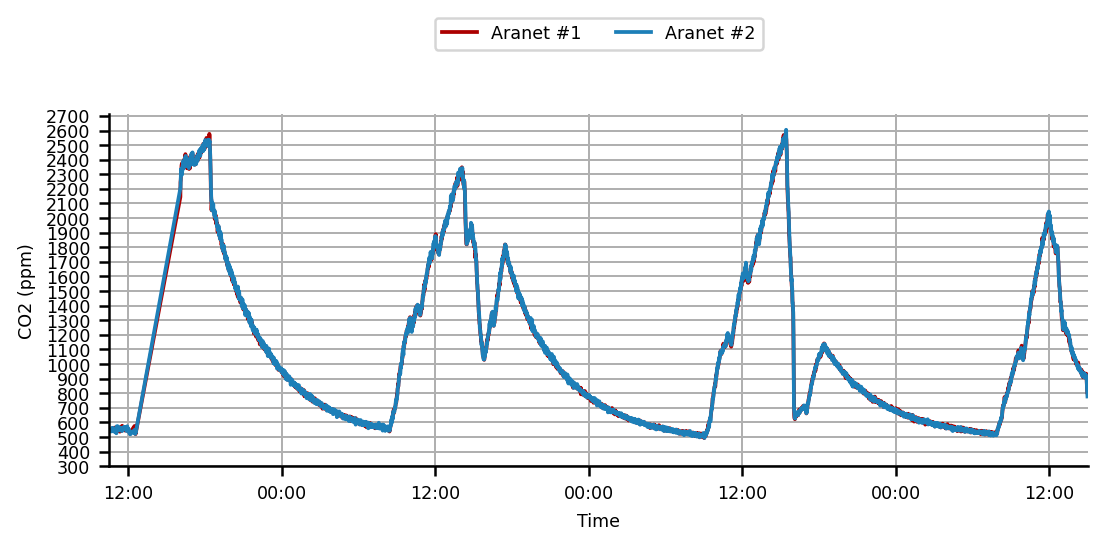

In [18]:
start_date='2022-08-12'

# This is selecting a subset of the data to plot and then resampling it to 1 min intervals
aranet4_1_co2_ppm = aranet1['CO2 (ppm)'][7500:11480]
aranet4_2_co2_ppm = aranet2['CO2 (ppm)'][7500:11480]
#day3_my_co_ppm = day3_3['CO (ppm)'][33000:38000]
#print(day3_my_co_ppm)

# Set up and plot the data
w,h = plt.figaspect(.3)
fig = plt.figure(figsize=(6,3), dpi=180)
ax1 = fig.add_subplot(111)

#l_my_co_ppm, = ax1.plot(day3_my_co_ppm, label="In-house", linewidth=1.5, color=colors['red'], linestyle='-')
l_1aranet4_co2_ppm, = ax1.plot(aranet4_1_co2_ppm, label="Aranet #1", linewidth=1.5, color=colors['red'], linestyle='-')
l_2aranet4_co2_ppm, = ax1.plot(aranet4_2_co2_ppm, label="Aranet #2", linewidth=1.5, color=colors['blue'], linestyle='-')
ax1.set_xlim(pd.Timestamp('2022-08-15 10:29:47'), pd.Timestamp('2022-08-18 15:02:45'))

myFmt = mdates.DateFormatter('%H:%M')

ax1.xaxis.set_major_formatter(myFmt)

remove_borders(ax1, lw=1, l_len=4)

plt.grid()
plt.yticks(np.arange(300, 2800, 100))
plt.legend(handles=[l_1aranet4_co2_ppm, l_2aranet4_co2_ppm,], bbox_to_anchor=(0.35, 1.1, 0.3, 0.2), ncol=8, loc='upper center')
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          #ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
#fig.subplots_adjust(hspace=0.001)
plt.ylabel("CO2 (ppm)")
plt.xlabel("Time")
plt.savefig('aranet_plot.svg', format='svg', dpi=300)

In [11]:
# Read in the data
#f = files.upload()
with open('1pasco2-20220906-1812.csv') as f:
    data = f.readlines()[2:]

id = []
digital_co_ppm = []
t = []

#if(len(data[2:10][0].split(','))==6):
#    print(data[1:10][0].split(',')[1:])
#for row in data[:40]:
#    try:
#    if(len(row.split(','))!=7):
#        print(row.strip())

for row in data:
    col = row.split(',')
    if len(col)==7:
        col = col[1:]
        col[2] = col[2][1:]
        col[2] = col[2][:18]
        temp = col[2].split(' ');
        
        modify_temp = temp[1]
        modify_temp1 = modify_temp.split(':');
        # print(col[2][1:8])
        # print(str(int(col[2][8])-1))
        if modify_temp1[0] == '00':
          # print("hey:" + col[2])
          col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '1' + '7' + col[2][12:]
          # print(col[2])
        elif modify_temp1[0] == '01':
           col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '1' + '8' + col[2][12:]
        elif modify_temp1[0] == '02':
           col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '1' + '9' + col[2][12:]
        elif modify_temp1[0] == '03':
           col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '2' + '0' + col[2][12:]
        elif modify_temp1[0] == '04':
           col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '2' + '1' + col[2][12:]
        elif modify_temp1[0] == '05':
           col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '2' + '2' + col[2][12:]
        elif modify_temp1[0] == '06':
           col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '2' + '3' + col[2][12:]
        else:
          col[2] = '0' + col[2][1:10] + str(int(modify_temp1[0])-7) + col[2][12:]
        t.append(datetime.strptime("2%s"%col[2], "%Y-%m-%d %H:%M:%S"))
        digital_co_ppm.append(col[0].split()[0])
        id.append(col[1].split()[0])
        # lux.append(col[3].split()[0])
        # bme_temp.append(col[4].split()[0])
        # bme_pressure.append(col[5].split()[0])
        # bme_RH.append(col[6].split()[0])
        # voltage.append(col[7].split()[0])

PASCO1 = pd.DataFrame(
        {"CO2 (ppm)":pd.to_numeric(digital_co_ppm, errors='coerce')}, index=t)
print(PASCO1)

                     CO2 (ppm)
2022-08-12 12:28:53        604
2022-08-12 12:29:10        601
2022-08-12 12:29:29        601
2022-08-12 12:29:47        600
2022-08-12 12:30:05        595
...                        ...
2022-08-18 14:58:03        987
2022-08-18 14:59:11        946
2022-08-18 15:00:19        920
2022-08-18 15:01:28        899
2022-08-18 15:02:37        876

[11121 rows x 1 columns]


In [12]:
# Read in the data
#f = files.upload()
with open('2pasco2-20220906-1813.csv') as f:
    data = f.readlines()[2:]

id = []
digital_co_ppm = []
t = []

#if(len(data[2:10][0].split(','))==6):
#    print(data[1:10][0].split(',')[1:])
#for row in data[:40]:
#    try:
#    if(len(row.split(','))!=7):
#        print(row.strip())

for row in data:
    col = row.split(',')
    if len(col)==7:
        col = col[1:]
        col[2] = col[2][1:]
        col[2] = col[2][:18]
        temp = col[2].split(' ');
        
        modify_temp = temp[1]
        modify_temp1 = modify_temp.split(':');
        # print(col[2][1:8])
        # print(str(int(col[2][8])-1))
        if modify_temp1[0] == '00':
          # print("hey:" + col[2])
          col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '1' + '7' + col[2][12:]
          # print(col[2])
        elif modify_temp1[0] == '01':
           col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '1' + '8' + col[2][12:]
        elif modify_temp1[0] == '02':
           col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '1' + '9' + col[2][12:]
        elif modify_temp1[0] == '03':
           col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '2' + '0' + col[2][12:]
        elif modify_temp1[0] == '04':
           col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '2' + '1' + col[2][12:]
        elif modify_temp1[0] == '05':
           col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '2' + '2' + col[2][12:]
        elif modify_temp1[0] == '06':
           col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '2' + '3' + col[2][12:]
        else:
          col[2] = '0' + col[2][1:10] + str(int(modify_temp1[0])-7) + col[2][12:]
        t.append(datetime.strptime("2%s"%col[2], "%Y-%m-%d %H:%M:%S"))
        digital_co_ppm.append(col[0].split()[0])
        id.append(col[1].split()[0])
        # lux.append(col[3].split()[0])
        # bme_temp.append(col[4].split()[0])
        # bme_pressure.append(col[5].split()[0])
        # bme_RH.append(col[6].split()[0])
        # voltage.append(col[7].split()[0])

PASCO2 = pd.DataFrame(
        {"CO2 (ppm)":pd.to_numeric(digital_co_ppm, errors='coerce')}, index=t)
print(PASCO2)

                     CO2 (ppm)
2022-08-12 12:28:54        588
2022-08-12 12:29:10        585
2022-08-12 12:29:30        588
2022-08-12 12:29:47        579
2022-08-12 12:30:06        579
...                        ...
2022-08-18 14:58:03        962
2022-08-18 14:59:12        941
2022-08-18 15:00:20        893
2022-08-18 15:01:28        864
2022-08-18 15:02:37        849

[11114 rows x 1 columns]


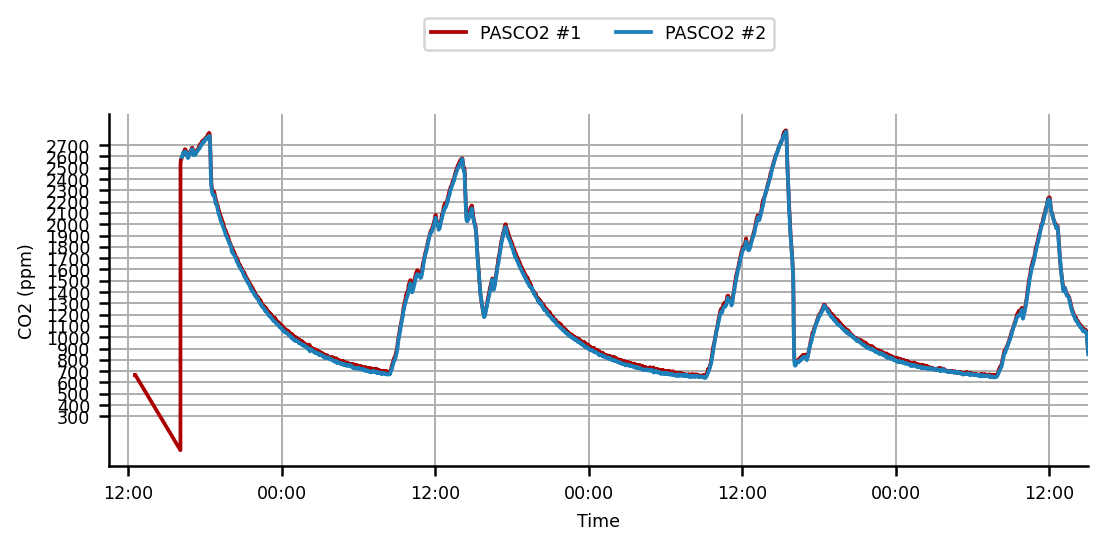

In [19]:
start_date='2022-08-12'

# This is selecting a subset of the data to plot and then resampling it to 1 min intervals
PASCO1_co2_ppm = PASCO1['CO2 (ppm)'][7500:11480]
PASCO2_co2_ppm = PASCO2['CO2 (ppm)'][7500:11480]
#day3_my_co_ppm = day3_3['CO (ppm)'][33000:38000]
#print(day3_my_co_ppm)

# Set up and plot the data
w,h = plt.figaspect(.3)
fig = plt.figure(figsize=(6,3), dpi=180)
ax1 = fig.add_subplot(111)

#l_my_co_ppm, = ax1.plot(day3_my_co_ppm, label="In-house", linewidth=1.5, color=colors['red'], linestyle='-')
l_PASCO1_co2_ppm, = ax1.plot(PASCO1_co2_ppm, label="PASCO2 #1", linewidth=1.5, color=colors['red'], linestyle='-')
l_PASCO2_co2_ppm, = ax1.plot(PASCO2_co2_ppm, label="PASCO2 #2", linewidth=1.5, color=colors['blue'], linestyle='-')
ax1.set_xlim(pd.Timestamp('2022-08-15 10:29:47'), pd.Timestamp('2022-08-18 15:02:45'))

myFmt = mdates.DateFormatter('%H:%M')

ax1.xaxis.set_major_formatter(myFmt)

remove_borders(ax1, lw=1, l_len=4)

plt.grid()
plt.yticks(np.arange(300, 2800, 100))
plt.legend(handles=[l_PASCO1_co2_ppm, l_PASCO2_co2_ppm,], bbox_to_anchor=(0.35, 1.1, 0.3, 0.2), ncol=8, loc='upper center')
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          #ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
#fig.subplots_adjust(hspace=0.001)
plt.ylabel("CO2 (ppm)")
plt.xlabel("Time")
plt.savefig('pasco_plot.svg', format='svg', dpi=300)

In [14]:
# Read in the data
#f = files.upload()
with open('1scd41-20220906-1813.csv') as f:
    data = f.readlines()[2:]

id = []
digital_co_ppm = []
t = []

#if(len(data[2:10][0].split(','))==6):
#    print(data[1:10][0].split(',')[1:])
#for row in data[:40]:
#    try:
#    if(len(row.split(','))!=7):
#        print(row.strip())

for row in data:
    col = row.split(',')
    if len(col)==7:
        col = col[1:]
        col[2] = col[2][1:]
        col[2] = col[2][:18]
        temp = col[2].split(' ');
        
        modify_temp = temp[1]
        modify_temp1 = modify_temp.split(':');
        # print(col[2][1:8])
        # print(str(int(col[2][8])-1))
        if modify_temp1[0] == '00':
          # print("hey:" + col[2])
          col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '1' + '7' + col[2][12:]
          # print(col[2])
        elif modify_temp1[0] == '01':
           col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '1' + '8' + col[2][12:]
        elif modify_temp1[0] == '02':
           col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '1' + '9' + col[2][12:]
        elif modify_temp1[0] == '03':
           col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '2' + '0' + col[2][12:]
        elif modify_temp1[0] == '04':
           col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '2' + '1' + col[2][12:]
        elif modify_temp1[0] == '05':
           col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '2' + '2' + col[2][12:]
        elif modify_temp1[0] == '06':
           col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '2' + '3' + col[2][12:]
        else:
          col[2] = '0' + col[2][1:10] + str(int(modify_temp1[0])-7) + col[2][12:]
        t.append(datetime.strptime("2%s"%col[2], "%Y-%m-%d %H:%M:%S"))
        digital_co_ppm.append(col[0].split()[0])
        id.append(col[1].split()[0])
        # lux.append(col[3].split()[0])
        # bme_temp.append(col[4].split()[0])
        # bme_pressure.append(col[5].split()[0])
        # bme_RH.append(col[6].split()[0])
        # voltage.append(col[7].split()[0])

scd41_1 = pd.DataFrame(
        {"CO2 (ppm)":pd.to_numeric(digital_co_ppm, errors='coerce')}, index=t)
print(scd41_1)

                     CO2 (ppm)
2022-08-12 12:29:29        475
2022-08-12 12:29:47        473
2022-08-12 12:30:05        472
2022-08-12 12:30:25        471
2022-08-12 12:30:46        473
...                        ...
2022-08-18 14:58:02        754
2022-08-18 14:59:11        722
2022-08-18 15:00:19        695
2022-08-18 15:01:27        663
2022-08-18 15:02:36        650

[11542 rows x 1 columns]


In [15]:
# Read in the data
#f = files.upload()
with open('2scd41-20220906-1813.csv') as f:
    data = f.readlines()[2:]

id = []
digital_co_ppm = []
t = []

#if(len(data[2:10][0].split(','))==6):
#    print(data[1:10][0].split(',')[1:])
#for row in data[:40]:
#    try:
#    if(len(row.split(','))!=7):
#        print(row.strip())

for row in data:
    col = row.split(',')
    if len(col)==7:
        col = col[1:]
        col[2] = col[2][1:]
        col[2] = col[2][:18]
        temp = col[2].split(' ');
        
        modify_temp = temp[1]
        modify_temp1 = modify_temp.split(':');
        # print(col[2][1:8])
        # print(str(int(col[2][8])-1))
        if modify_temp1[0] == '00':
          # print("hey:" + col[2])
          col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '1' + '7' + col[2][12:]
          # print(col[2])
        elif modify_temp1[0] == '01':
           col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '1' + '8' + col[2][12:]
        elif modify_temp1[0] == '02':
           col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '1' + '9' + col[2][12:]
        elif modify_temp1[0] == '03':
           col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '2' + '0' + col[2][12:]
        elif modify_temp1[0] == '04':
           col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '2' + '1' + col[2][12:]
        elif modify_temp1[0] == '05':
           col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '2' + '2' + col[2][12:]
        elif modify_temp1[0] == '06':
           col[2] = '0' + col[2][1:8] + str(int(col[2][8])-1) + col[2][9] + '2' + '3' + col[2][12:]
        else:
          col[2] = '0' + col[2][1:10] + str(int(modify_temp1[0])-7) + col[2][12:]
        t.append(datetime.strptime("2%s"%col[2], "%Y-%m-%d %H:%M:%S"))
        digital_co_ppm.append(col[0].split()[0])
        id.append(col[1].split()[0])
        # lux.append(col[3].split()[0])
        # bme_temp.append(col[4].split()[0])
        # bme_pressure.append(col[5].split()[0])
        # bme_RH.append(col[6].split()[0])
        # voltage.append(col[7].split()[0])

scd41_2 = pd.DataFrame(
        {"CO2 (ppm)":pd.to_numeric(digital_co_ppm, errors='coerce')}, index=t)
print(scd41_2)

                     CO2 (ppm)
2022-08-12 12:29:29        436
2022-08-12 12:29:47        437
2022-08-12 12:30:05        435
2022-08-12 12:30:26        436
2022-08-12 12:30:46        437
...                        ...
2022-08-18 14:58:02        725
2022-08-18 14:59:11        699
2022-08-18 15:00:19        661
2022-08-18 15:01:28        640
2022-08-18 15:02:37        626

[11542 rows x 1 columns]


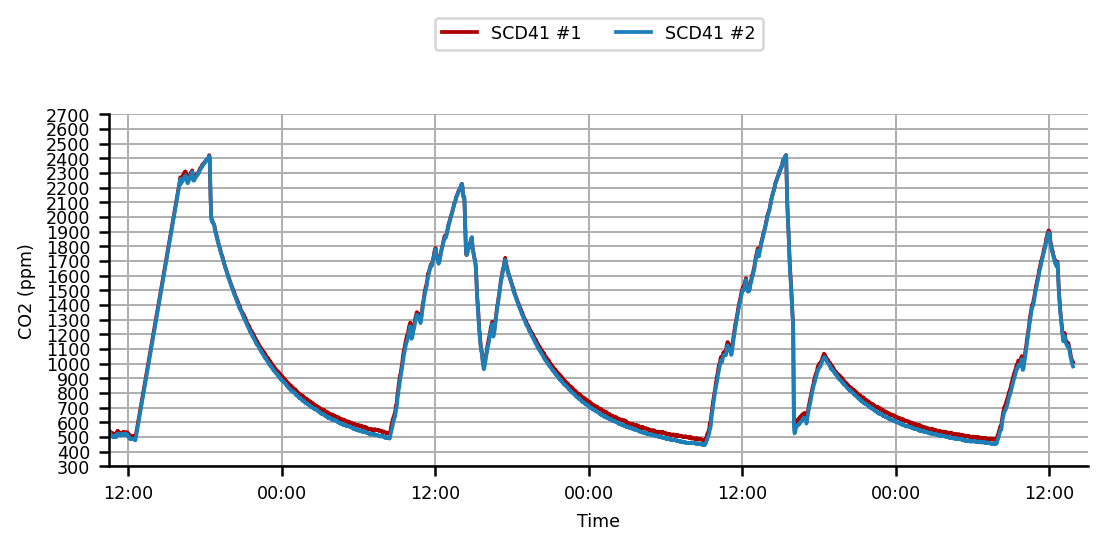

In [20]:
start_date='2022-08-12'

# This is selecting a subset of the data to plot and then resampling it to 1 min intervals
scd41_1_co2_ppm = scd41_1['CO2 (ppm)'][7500:11480]
scd41_2_co2_ppm = scd41_2['CO2 (ppm)'][7500:11480]
#day3_my_co_ppm = day3_3['CO (ppm)'][33000:38000]
#print(day3_my_co_ppm)

# Set up and plot the data
w,h = plt.figaspect(.3)
fig = plt.figure(figsize=(6,3), dpi=180)
ax1 = fig.add_subplot(111)

#l_my_co_ppm, = ax1.plot(day3_my_co_ppm, label="In-house", linewidth=1.5, color=colors['red'], linestyle='-')
l_scd41_1_co2_ppm, = ax1.plot(scd41_1_co2_ppm, label="SCD41 #1", linewidth=1.5, color=colors['red'], linestyle='-')
l_scd41_2_co2_ppm, = ax1.plot(scd41_2_co2_ppm, label="SCD41 #2", linewidth=1.5, color=colors['blue'], linestyle='-')
ax1.set_xlim(pd.Timestamp('2022-08-15 10:29:47'), pd.Timestamp('2022-08-18 15:02:45'))

myFmt = mdates.DateFormatter('%H:%M')

ax1.xaxis.set_major_formatter(myFmt)

remove_borders(ax1, lw=1, l_len=4)

plt.grid()
plt.yticks(np.arange(300, 2800, 100))
plt.legend(handles=[l_scd41_1_co2_ppm, l_scd41_2_co2_ppm,], bbox_to_anchor=(0.35, 1.1, 0.3, 0.2), ncol=8, loc='upper center')
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          #ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
#fig.subplots_adjust(hspace=0.001)
plt.ylabel("CO2 (ppm)")
plt.xlabel("Time")
plt.savefig('scd41_plot.svg', format='svg', dpi=300)

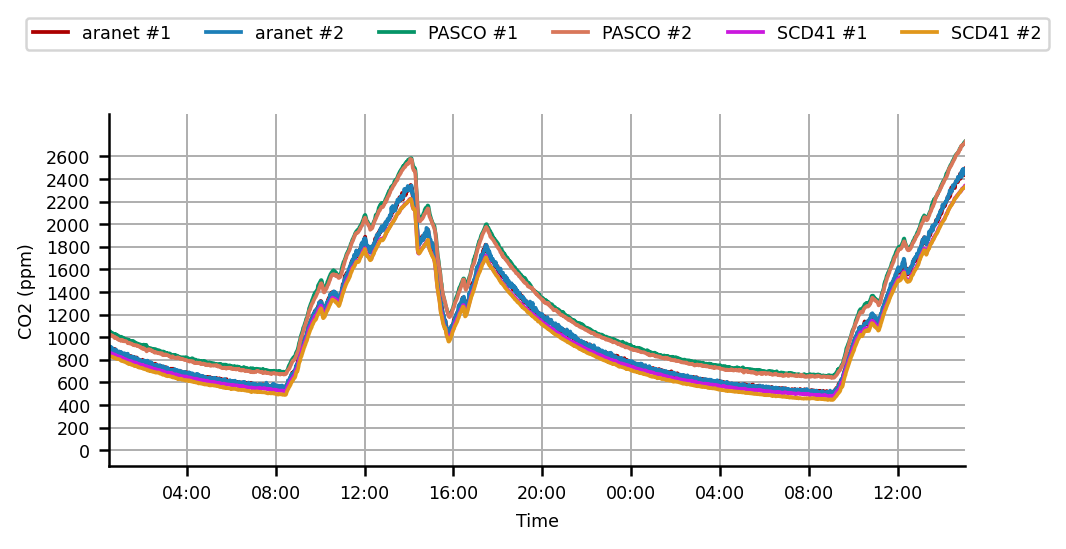

In [21]:
start_date='2022-08-12'

# This is selecting a subset of the data to plot and then resampling it to 1 min intervals
aranet4_1_co2_ppm = aranet1['CO2 (ppm)'][7500:11480]
aranet4_2_co2_ppm = aranet2['CO2 (ppm)'][7500:11480]
PASCO1_co2_ppm = PASCO1['CO2 (ppm)'][7500:11480]
PASCO2_co2_ppm = PASCO2['CO2 (ppm)'][7500:11480]
scd41_1_co2_ppm = scd41_1['CO2 (ppm)'][7500:11480]
scd41_2_co2_ppm = scd41_2['CO2 (ppm)'][7500:11480]
#day3_my_co_ppm = day3_3['CO (ppm)'][33000:38000]
#print(day3_my_co_ppm)

# Set up and plot the data
w,h = plt.figaspect(.3)
fig = plt.figure(figsize=(6,3), dpi=180)
ax1 = fig.add_subplot(111)

#l_my_co_ppm, = ax1.plot(day3_my_co_ppm, label="In-house", linewidth=1.5, color=colors['red'], linestyle='-')
l_1aranet4_co2_ppm, = ax1.plot(aranet4_1_co2_ppm, label="aranet #1", linewidth=1.5, color=colors['red'], linestyle='-')
l_2aranet4_co2_ppm, = ax1.plot(aranet4_2_co2_ppm, label="aranet #2", linewidth=1.5, color=colors['blue'], linestyle='-')
l_PASCO1_co2_ppm, = ax1.plot(PASCO1_co2_ppm, label="PASCO #1", linewidth=1.5, color=colors['green'], linestyle='-')
l_PASCO2_co2_ppm, = ax1.plot(PASCO2_co2_ppm, label="PASCO #2", linewidth=1.5, color=colors['brown'], linestyle='-')
l_scd41_1_co2_ppm, = ax1.plot(scd41_1_co2_ppm, label="SCD41 #1", linewidth=1.5, color=colors['purple'], linestyle='-')
l_scd41_2_co2_ppm, = ax1.plot(scd41_2_co2_ppm, label="SCD41 #2", linewidth=1.5, color=colors['gold'], linestyle='-')
ax1.set_xlim(pd.Timestamp('2022-08-16 00:29:47'), pd.Timestamp('2022-08-17 15:02:45'))

myFmt = mdates.DateFormatter('%H:%M')

ax1.xaxis.set_major_formatter(myFmt)

remove_borders(ax1, lw=1, l_len=4)

plt.grid()
plt.yticks(np.arange(0, 2800, 200))
plt.legend(handles=[l_1aranet4_co2_ppm, l_2aranet4_co2_ppm, l_PASCO1_co2_ppm, l_PASCO2_co2_ppm, l_scd41_1_co2_ppm, l_scd41_2_co2_ppm,], bbox_to_anchor=(0.35, 1.1, 0.3, 0.2), ncol=8, loc='upper center')
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          #ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
#fig.subplots_adjust(hspace=0.001)
plt.ylabel("CO2 (ppm)")
plt.xlabel("Time")
plt.savefig('CO2_plot_with_6sensors.svg', format='svg', dpi=300)